In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df = pd.read_csv(url)

In [3]:
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


# Lec 1

використайте всі 3 бібліотеки (для 1 завдання потрібна тільки 1 бібліотека)

виведіть перші 2 записи датасету

In [4]:
df.head(2)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030


виведіть опис датафрейму (статистичні метрики одночасно по всіх колонках)

In [5]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


скільки країн в датасеті?

In [6]:
df['country'].nunique()

142

в якої країни було найбільше населення в 1997 році?

In [7]:
def get_country_with_max_population(df: pd.DataFrame, year: int) -> pd.DataFrame:
    return df.loc[df.query('year == @year')['pop'].idxmax(), ['country', 'pop']].to_frame().T


get_country_with_max_population(df, 1997)

,country,pop
297,China,1230075000.0


середня тривалість життя в Африці на 2007 рік

In [8]:
def get_avg_life_exp(df: pd.DataFrame, continent: str, year: int) -> pd.DataFrame:
    return df.query('year == @year and continent == @continent') \
             .groupby(['continent', 'year']) \
             .agg(mean_lifeExp=('lifeExp', 'mean')) \
             .reset_index()


get_avg_life_exp(df, 'Africa', 2007)

,continent,year,mean_lifeExp
0,Africa,2007,54.806038


в якій країні Європи найменший ВВП? (1992 рік)

In [9]:
def get_country_with_min_gdp(df: pd.DataFrame, continent: str, year: int) -> pd.DataFrame:
    data = df.query('continent == @continent and year == @year')
    idxmin_gdp = data['gdpPercap'].idxmin()
    return df.loc[idxmin_gdp, ['continent', 'year', 'country', 'gdpPercap']].to_frame().T


get_country_with_min_gdp(df, 'Europe', 1992)

,continent,year,country,gdpPercap
20,Europe,1992,Albania,2497.437901


який % населення світу живе в Азії? (2007 рік)

In [10]:
def get_percentage_population_by_continent(df: pd.DataFrame, continent: str, year: int) -> str:
    data = df.query('year == @year') \
                    .loc[:, ['continent', 'pop']]

    pop_continent = data.query('continent == @continent')['pop'].sum().item()
    pop_total = data['pop'].sum().item()
    return '{:.2f}%'.format((pop_continent / pop_total) * 100)


get_percentage_population_by_continent(df, 'Asia', 2007)

'60.98%'

в якої країни світу найбільше зріс ВВП з 1952 по 2007 рік?

в абсолюті:

In [11]:
def gdp_growth(df: pd.DataFrame, year_start: int, year_end: int) -> pd.pivot_table:
    pivot = df.query('year in (@year_start, @year_end)') \
              .pivot_table(index='country', columns='year', values='gdpPercap', aggfunc='sum')
    pivot['growth'] = pivot[year_end] - pivot[year_start]
    pivot['growth(%)'] = pivot.apply(lambda x: round((x[year_start] + x['growth']) / x[year_start] * 100, 2), axis=1)
    return pivot


gdp_data = gdp_growth(df, 1952, 2007)
print(gdp_data.sort_values('growth', ascending=False).head(1))

year              1952         2007        growth  growth(%)
country                                                     
Singapore  2315.138227  47143.17964  44828.041413     2036.3


у відсотках:

In [12]:
print(gdp_data.sort_values('growth(%)', ascending=False).head(1))

year                     1952         2007        growth  growth(%)
country                                                            
Equatorial Guinea  375.643123  12154.08975  11778.446627    3235.54


# Lec 2

побудуйте гістограму (bar chart) ВВП США (х - роки, у - розмір ВВП)

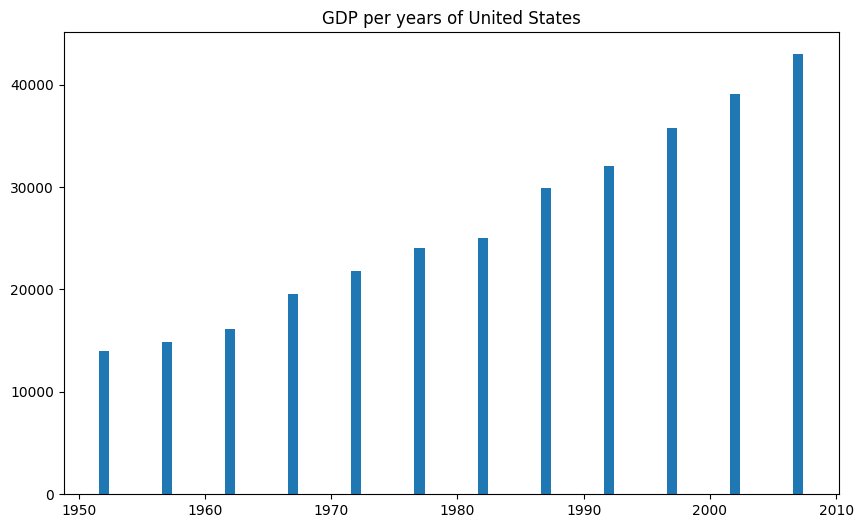

In [13]:
def show_plot_gdp_bar_chart(df: pd.DataFrame, country: str):
    data = df.query('country == @country')
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f'GDP per years of {country}')
    ax.bar(data['year'], data['gdpPercap'])
    plt.show()


show_plot_gdp_bar_chart(df, 'United States')

виведіть розподіл ВВП країн на 2007 рік

In [14]:
def show_capacita_barplot(df: pd.DataFrame, title = None):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(df, x='gdpPercap', y='country', ax=ax)
    plt.title(title)
    plt.xlabel('GPD per capacita')
    plt.ylabel(None)
    for index, value in enumerate(df['gdpPercap']):
        ax.text(x=value/4, y=index + 0.1, s='{:.2f}'.format(value), fontdict={'color':'white'})
    plt.show()

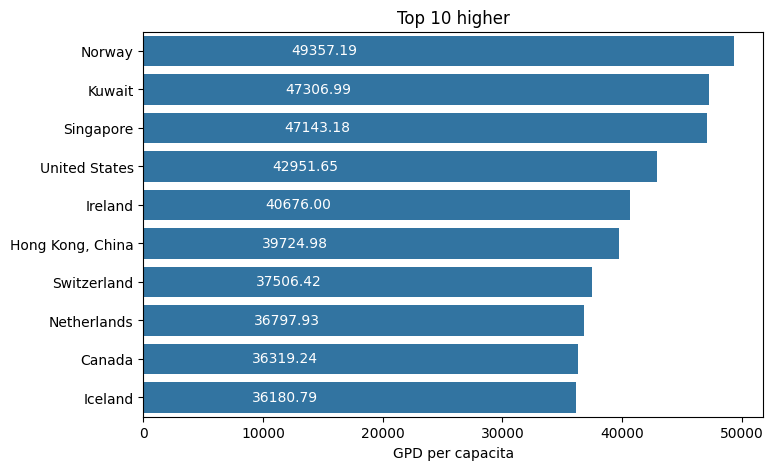

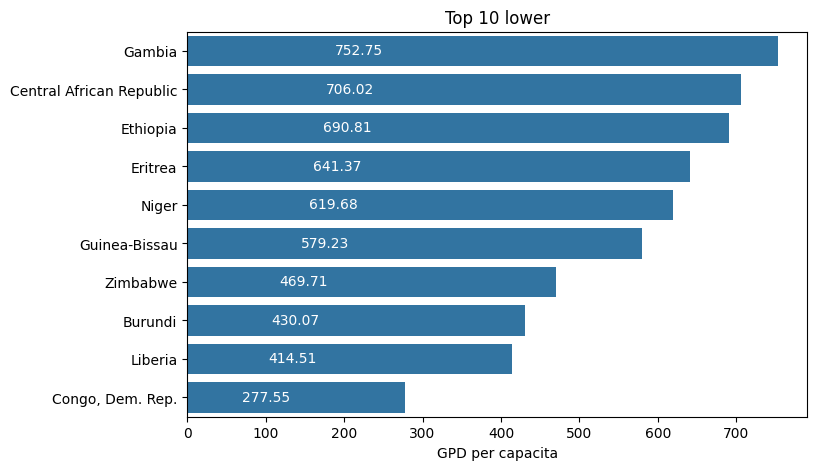

In [15]:
def show_gdp_rate(df: pd.DataFrame, year: int, count_higher: int = 10, count_lower: int = 10):
    data = df.query('year == @year')

    sorted_data = data.sort_values('gdpPercap', ascending=False)
    show_capacita_barplot(sorted_data.iloc[:count_higher, :], title=f'Top {count_higher} higher')
    show_capacita_barplot(sorted_data.iloc[-count_lower:, :], title=f'Top {count_lower} lower')

    fig = px.bar(data, x="country", y="gdpPercap", color="country", title="GDP by Country")
    fig.update_layout(width=1600, height=800)
    fig.show()
    
    
show_gdp_rate(df, 2007)

Побудова деревовидної діаграми

кількість населення по континентах на 2007 рік

In [16]:
def show_population_treemap(df: pd.DataFrame, year: int):
    data = df.query('year == @year') \
             .groupby(['continent', 'country']) \
             .aggregate(sum_pop=('pop', 'sum')) \
             .reset_index()
         
    fig = px.treemap(data, path=['continent', 'country'], values='sum_pop', color_discrete_sequence=px.colors.qualitative.G10)
    fig.update_layout(width=1600, height=800)
    fig.show()
    

show_population_treemap(df, 2007)

Зверність увагу на цей корисний ресурс! Тут зібрані основні візуалізації разом з кодом. Сподіваюсь буде Вам в нагоді.

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/